In [2]:
import scipy.stats as st
import numpy as np
import math
import matplotlib.pyplot as plt

teta0 = -7
teta1 = -1
teta2 = -5
teta3 = 0.04
sigma = 2.4
m = 0
n = 40
X0 = np.zeros(n)
Y = np.zeros(n)
Phi = np.zeros(n)

norm_osh = [-0.59732192, 0.24330789, -1.93128633, 1.81018096, -3.11931026, -0.57657291,
-4.58993873, 0.27401518, 4.34012437, -0.70823114, -3.05469004, -4.01474302,
 0.78272316, 3.85064371, 2.28937739, 4.21662767, -1.09872973, -1.79872616,
 0.23884594, -3.76528106, -3.3849353, -2.67267488, 3.1571457, -2.37653555,
-0.0477666, 2.55820417, 0.6890941, -2.97675146, -4.00881463, -2.22768625,
 2.92945126, -1.88661446, -4.08511124, -2.32486449, 1.94673452, -3.14759081,
-3.25022835, 0.62785036, 2.97288177, -1.18394696]

for k in range(n):
    X0[k] = -4 + 0.2 * (k + 1)
    Phi[k] = teta0 + teta1 * X0[k] + teta2 * (X0[k] ** 2)
    Y[k] = teta0 + teta1 * X0[k] + teta2 * (X0[k] ** 2) + norm_osh[k]

TY = st.t.ppf(0.975, n - (m + 1)) + 1


while abs(TY) > st.t.ppf(0.975, n - m - 1):
    X = np.zeros((n, m + 1))
    for i in range(n):
        for j in range(m + 1):
            X[i][j] = X0[i] ** j
         
    teta_roof = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), Y)
    alpha = np.linalg.inv(np.matmul(np.transpose(X), X))[-1][-1]
    E = Y - np.matmul(X, teta_roof)
    E_norm = np.sqrt(np.matmul(np.transpose(E), E))
    TY = np.sqrt(teta_roof[-1] ** 2 * (n - m - 1)) / (alpha * E_norm ** 2)
    m += 1  
m -= 1

print('m =', m)
print('tetta =', teta_roof[m])


m = 0
tetta = -34.44752860325001


In [3]:
left95 = []
right95 = []

t = st.t.ppf(0.975, n - m - 1)
D = np.transpose(E).dot(E) / (n - m - 1)

for i in range(m + 1):
    left95.append(teta_roof[i] - t * np.sqrt(D * alpha))
    right95.append(teta_roof[i] + t * np.sqrt(D * alpha))

print('Доверительный интервал 0,95 = [{}, {}]'.format(left95[i], right95[i]))

Доверительный интервал 0,95 = [-42.37279351094045, -26.52226369555957]


In [4]:
left99 = []
right99 = []

t = st.t.ppf(0.995, n - m - 1) 

for i in range(m + 1):
    left99.append(teta_roof[i] - t * np.sqrt(D * alpha))
    right99.append(teta_roof[i] + t * np.sqrt(D * alpha))

print('Доверительный интервал 0,99 = [{}, {}]'.format(left99[i], right99[i]))

Доверительный интервал 0,99 = [-45.05761697705848, -23.837440229441533]


In [5]:
left_pol_95 = np.zeros(n)
right_pol_95 = np.zeros(n)
YP = np.zeros(n) 
u95 = st.norm.ppf(1 - 0.05 / 2)

for i in range(n):
    for j in range(m + 1):
        YP[i] += teta_roof[j] * (X[i] ** j)


for j in range(n):
    left_pol_95[j] = YP[j] - u95 * np.sqrt(D * (X[j].dot(np.linalg.inv(np.transpose(X).dot(X)))).dot(np.transpose(X[j])))
    right_pol_95[j] = YP[j] + u95 * np.sqrt(D * (X[j].dot(np.linalg.inv(np.transpose(X).dot(X)))).dot(np.transpose(X[j])))

print('Доверительные интервалы уровня надежности 0,95 = [{}, {}]'.format(left_pol_95[i], right_pol_95[i]))

Доверительные интервалы уровня надежности 0,95 = [-42.12701818660439, -26.768039019895628]


In [6]:
left_pol_99 = np.zeros(n)
right_pol_99 = np.zeros(n)
u99 = st.norm.ppf(1 - 0.01 / 2)


for j in range(n):
    left_pol_99[j] = YP[j] - u99 * np.sqrt(D * (X[j].dot(np.linalg.inv(np.transpose(X).dot(X)))).dot(np.transpose(X[j])))
    right_pol_99[j] = YP[j] + u99 * np.sqrt(D * (X[j].dot(np.linalg.inv(np.transpose(X).dot(X)))).dot(np.transpose(X[j])))

print('Доверительные интервалы уровня надежности 0,99 = [{}, {}]'.format(left_pol_99[i], right_pol_99[i]))

Доверительные интервалы уровня надежности 0,99 = [-44.540088701870786, -24.354968504629227]


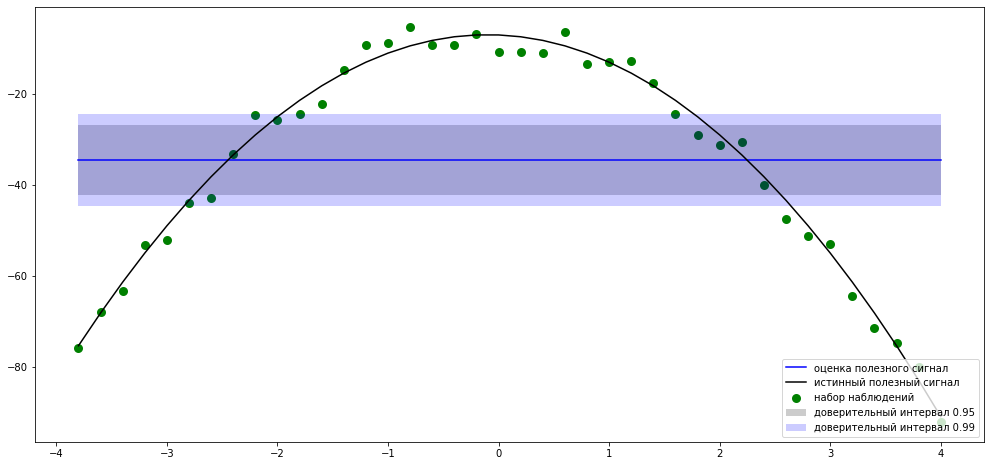

In [7]:
plt.figure(figsize=(17, 8))
plt.scatter(X0.tolist(), Y.tolist(), color='green', label='набор наблюдений', linewidth=3)
plt.plot(X0.tolist(), YP.tolist(), color='blue', label='оценка полезного сигнал')
plt.plot(X0.tolist(), Phi.tolist(), color='black', label='истинный полезный сигнал')

plt.fill_between(X0.tolist(), left_pol_95.tolist(), right_pol_95.tolist(), facecolor='black', alpha=0.2, label='доверительный интервал 0.95')
plt.fill_between(X0.tolist(), left_pol_99.tolist(), right_pol_99.tolist(), facecolor='blue', alpha=0.2, label='доверительный интервал 0.99')

plt.legend(loc='lower right')
plt.show()


l = 6
max(E) = 29.26415627325001, min(E) = -57.736418356749994
delta = 14.500095771666667
Точки разбиения: [-57.73641836 -43.23632259 -28.73622681 -14.23613104   0.26396473
  14.7640605   29.26415627]
Количество ошибок в каждом промежутке: [ 2.  6.  4.  4. 10. 14.]
Значения dest:  [0.00344825 0.01034476 0.00689651 0.00689651 0.01724127 0.02413777]


Text(0.5, 1.0, 'Гистограмма оценки плотности распределения случайной ошибки наблюдения')

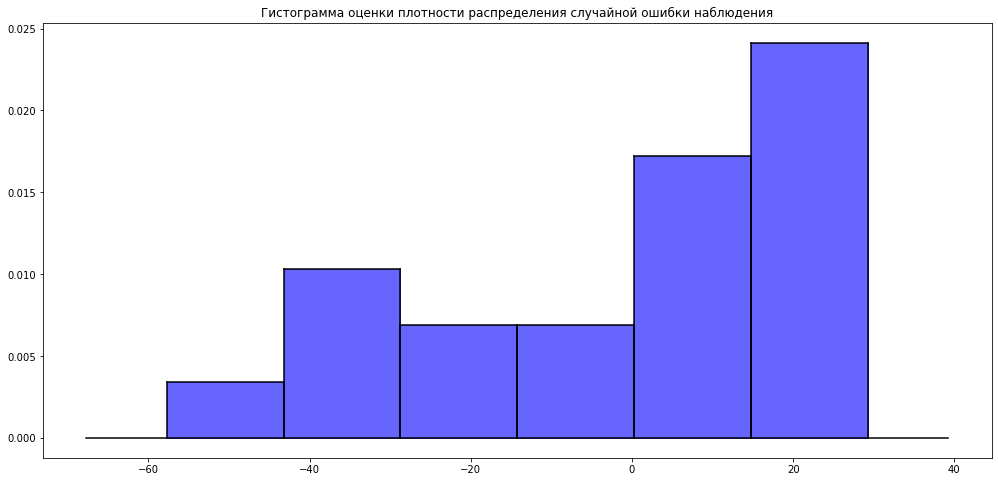

In [8]:
l = round(np.sqrt(n)) 
delta = (max(E) - min(E)) / l
count = np.zeros(l)
dest = np.zeros(l)
t = np.zeros(l + 1)
t[0] = min(E)

for i in range(l):
    t[i + 1] = min(E) + (i + 1) * delta

for i in range(n):
    for j in range(l):
        if (min(E) + j * delta) <= E[i] < (min(E) + (j + 1) * delta):
            count[j] += 1
count[-2] += 1

for i in range(l):
    dest[i] = count[i] / (n * delta)
    
print("l =", l)
print("max(E) = {}, min(E) = {}".format(max(E), min(E)))
print("delta =", delta)
print("Точки разбиения:", t)
print("Количество ошибок в каждом промежутке:", count)
print('Значения dest: ', dest)

    
fig, ax = plt.subplots(figsize=(17, 8))
for i in range(l):
    ax.plot([min(E) + i * delta, min(E) + i * delta], [0, dest[i]], c='black')
    ax.plot([min(E) + i * delta, min(E) + (i + 1) * delta], [dest[i], dest[i]], c='black')
    ax.plot([min(E) + (i + 1) * delta, min(E) + (i + 1) * delta], [dest[i], 0], c='black')
    o = [t[i], t[i], t[i+1], t[i+1]]
    w = [0, dest[i], dest[i], 0]
    ax.fill(o, w, color='blue', alpha=0.6)
ax.plot([min(E) - 10, max(E) + 10], [0, 0], c='black')
plt.title('Гистограмма оценки плотности распределения случайной ошибки наблюдения')

In [10]:
D = np.transpose(E).dot(E) / (n - m - 1)
print('Оценка дисперсии случайных ошибок:', D)

Оценка дисперсии случайных ошибок: 614.0850443914649


In [11]:
s = 1
p = np.zeros(l + 2) 
mean = np.mean(norm_osh)

p[0] = st.norm.cdf((t[0] - mean) / np.sqrt(D))
p[-1] = 1 - st.norm.cdf((t[-1] - mean) / np.sqrt(D))

for i in range(1, l + 1):
    p[i] = st.norm.cdf((t[i] - mean) / np.sqrt(D)) - st.norm.cdf((t[i - 1] - mean) / np.sqrt(D))

Z = n * p[0] + n * p[-1] 
for i in range(1, l + 1): 
    Z += ((count[i - 1] - n * p[i]) ** 2 / (n * p[i])) 
    
if 0 <= Z <= st.chi2.ppf(0.95, l + 1 - s):
    print("Z = {} принадлежит доверительной области G = [0, {}]".format(Z, st.chi2.ppf(0.95, l + 1 - s)))
    print("Н0 принимается")
else:
    print("Z = {} не принадлежит доверительной области G = [0, {}]".format(Z, st.chi2.ppf(0.95, l + 1 - s)))
    print("Н0 отвергается")


Z = 21.270038512549228 не принадлежит доверительной области G = [0, 12.591587243743977]
Н0 отвергается
